In [1]:
import scipy.io
import numpy as np
import mne
import os
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [2]:
# download_url = [
#     "https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip"
# ]

# for i in download_url:
#     os.system("wget --no-check-certificate -P /mnt/Data/Data/EEG_Converted "+i)

In [3]:


from tensorflow import keras
from keras import layers
import time

dataset = []
labels = []
multigrasp_dataset = []
reaching_dataset = []
twist_dataset = []
for filename in os.listdir('/mnt/Data/Data/EEG_Converted'):
    if 'MI' in filename:
        filepath = os.path.join('/mnt/Data/Data/EEG_Converted', filename)
        data = scipy.io.loadmat(filepath)
        data.pop('__header__')
        data.pop('__version__')
        data.pop('__globals__')
        data.pop('mrk')
        data.pop('mnt')
        data.pop('nfo')
        data.pop('dat')
        
        data_arr = np.array(data['ch15'])
        for ch in range(16, 19):
            data_arr = np.concatenate((data_arr, data['ch'+str(ch)]), axis=1)
        for ch in range(43, 46):
            data_arr = np.concatenate((data_arr, data['ch'+str(ch)]), axis=1)
        data_arr = data_arr.T
        if 'multigrasp_MI' in filename:
            multigrasp_dataset.append(data_arr)
        if 'reaching_MI' in filename:
            reaching_dataset.append(data_arr)
        if 'twist_MI' in filename:
            twist_dataset.append(data_arr)

2023-12-02 13:27:05.709853: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 13:27:05.734474: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 13:27:05.734963: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 13:27:06.194232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


KeyboardInterrupt: 

In [4]:
def read_data(dataset):
    for i in range(len(dataset)):
        dataset[i] = np.resize(dataset[i],(14,2**23))
        d = dataset[i].astype(float)
        dataset[i] = mne.filter.filter_data(d, l_freq=0.1, h_freq=50,sfreq=2500)
        print(d.shape)
        
    dataset = np.array(dataset)
    print(dataset.shape)
    return dataset


In [5]:

#chan_names = ['Fp1','AF7','AF3','AFz','F7','F5','F3','F1','Fz','FT7','FC5','FC3','FC1','T7','C5','C3','C1','Cz','TP7','CP5','CP3','CP1','CPz','P7','P5','P3','P1','Pz','PO7','PO3','POz','Fp2','AF4','AF8','F2','F4','F6','F8','FC2','FC4','FC6','FT8','C2','C4','C6','T8','CP2','CP4','CP6','TP8','P2','P4','P6','P8','PO4','PO8','O1','Oz','O2','Iz']
#chan_names = ['C5','C3','C1','Cz','C2','C4','C6']
chan_names = ['C3', 'Cz', 'C4'] 
info = mne.create_info(ch_names=chan_names, ch_types=['eeg']*14, sfreq=2500)
info.set_montage('standard_1020')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 1250.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 2500.0 Hz
>


In [6]:
%%capture

multigrasp_epochs = mne.EpochsArray(data=read_data(multigrasp_dataset), info=info)
reaching_epochs = mne.EpochsArray(data=read_data(reaching_dataset), info=info)
twist_epochs = mne.EpochsArray(data=read_data(twist_dataset), info=info)
multigrasp_epochs1 = mne.EpochsArray(data=(multigrasp_dataset), info=info)
reaching_epochs1 = mne.EpochsArray(data=(reaching_dataset), info=info)
twist_epochs1 = mne.EpochsArray(data=(twist_dataset), info=info)

In [7]:
import matplotlib
from mne.time_frequency import tfr_morlet
%matplotlib inline
print(len(multigrasp_dataset))
print(len(reaching_dataset))
print(len(twist_dataset))



# for i in range(1):
#     print("________________________________ ",i+1)
#     d = multigrasp_epochs.get_data()[i]
#     theta = mne.filter.filter_data(d, sfreq=2500, l_freq=4, h_freq=8,verbose=False)
#     alpha = mne.filter.filter_data(d, sfreq=2500, l_freq=8, h_freq=12,verbose=False)
#     beta = mne.filter.filter_data(d, sfreq=2500, l_freq=12, h_freq=30,verbose=False)
#     delta = mne.filter.filter_data(d, sfreq=2500, l_freq=0.5, h_freq=4,verbose=False)
#     t_evoked = mne.EvokedArray(theta, info, tmin=0)
#     a_evoked = mne.EvokedArray(alpha, info, tmin=0)
#     b_evoked = mne.EvokedArray(beta, info, tmin=0)
#     d_evoked = mne.EvokedArray(delta, info, tmin=0)
#     print("theta")
#     t_evoked.plot()
#     print("alpha")
#     a_evoked.plot()
#     print("beta")
#     b_evoked.plot()
#     print("delta")
#     d_evoked.plot()
    
#     print("________________________________ ")

36
36
36


In [1]:
import scipy.io
import numpy as np
import mne
import os
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
data_list = []
# data_list.append(multigrasp_epochs.get_data())
# data_list.append(reaching_epochs.get_data())
# data_list.append(twist_epochs.get_data())
multigrasp_labels = [0 for i in range(36)] #[0 for i in range(multigrasp_epochs.get_data().shape[0])]
print(multigrasp_labels)

reaching_labels = [1 for i in range(36)]
print(reaching_labels)

twist_labels = [2 for i in range(36)]
print(twist_labels)

label_list = multigrasp_labels + reaching_labels + twist_labels


#data_array = np.vstack(data_list)
label_array = np.hstack(label_list)

print(label_array.shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
(108,)


In [2]:
#Functions for features
from scipy import stats
def mean(x):
    return np.mean(x,axis=-1)

def stddev(x):
    return np.std(x, axis=-1)

def peaktopeak(x):
    return np.ptp(x, axis=-1)

def variance(x):
    return np.var(x, axis=-1)

def mini(x):
    return np.min(x,axis=-1)

def maxi(x):
    return np.max(x,axis=-1)

def argmini(x):
    return np.argmin(x,axis=-1)

def argmaxi(x):
    return np.argmax(x,axis=-1)

def rms(x):
    return np.sqrt(np.mean(x**2,axis=-1))

def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)

def skewness(x):
    return stats.skew(x,axis=-1)

def kurtosis(x):
    return stats.kurtosis(x,axis=-1)

def concat_features(x):
    
    #print(mean_f.shape, mean_power.shape, peaktopeak(x).shape,rms(x).shape,abs_diff_signal(x).shape, skewness(x).shape, kurtosis(x).shape)
    return np.concatenate((peaktopeak(x),rms(x),abs_diff_signal(x), skewness(x), kurtosis(x), variance(x),mean(x),stddev(x)),axis=-1)

def featuresarray_load():
    features = []
    for d in data_array:
        #mean_power = np.mean(p,axis=0)
        theta = mne.filter.filter_data(d, sfreq=2500, l_freq=4, h_freq=8,verbose=False)
        alpha = mne.filter.filter_data(d, sfreq=2500, l_freq=8, h_freq=12,verbose=False)
        beta = mne.filter.filter_data(d, sfreq=2500, l_freq=12, h_freq=30,verbose=False)
        delta = mne.filter.filter_data(d, sfreq=2500, l_freq=0.5, h_freq=4,verbose=False)
        alph_ftrs = concat_features(alpha)
        beta_ftrs = concat_features(beta)
        theta_ftrs = concat_features(theta)    
        delta_ftrs = concat_features(delta)  
        # _, _, Zxx = scipy.signal.stft(beta, fs=2500)
        # magnitude = np.abs(Zxx)
        # stft_features = np.mean(magnitude, axis=-1)
        # stft_features = np.mean(stft_features, axis=0)
        #print(alph_ftrs.shape)
        f,p=scipy.signal.welch(beta, fs=2500,average='median')
        
        #psd_c3 = p[1, :]  # PSD values for C3 channel
        #psd_c4 = p[5, :]  # PSD values for C4 channel
        mean_power = np.mean(p,axis=0)
        res = np.mean([alph_ftrs,beta_ftrs,theta_ftrs,delta_ftrs],axis=0)
        #print('p',psd_c3.shape)
        res = np.concatenate((res,mean_power))
        #print(res.shape)
        features.append(res)
    return features

# f = np.array(featuresarray_load())
# np.save("features_array_otherchan.npy",allow_pickle=False,arr=f)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, LayerNormalization, Reshape
from keras.optimizers import Adam,SGD
from keras.metrics import categorical_crossentropy
from keras.backend import clear_session
from matplotlib.ticker import MultipleLocator
features_array = np.load(file="features_array_otherchan.npy")
GLOBAL_SHAPE_LENGTH = features_array.shape[1]
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))
# feature_names = [f'Peak-to-Peak {i+1}' for i in range(7)] + \
#                 [f'RMS {i+1}' for i in range(7)] + \
#                 [f'Abs Diff {i+1}' for i in range(7)] + \
#                 [f'Skewness {i+1}' for i in range(7)] + \
#                 [f'Kurtosis {i+1}' for i in range(7)] + \
#                 [f'Variance {i+1}' for i in range(7)] + \
#                 [f'Mean {i+1}' for i in range(7)] + \
#                 [f'Stddev {i+1}' for i in range(7)] + \
#                 [f'psd c3 {i+1}' for i in range(129)] + \
#                 [f'psd c4 {i+1}' for i in range(129)]



# for i in [1,37,107]:
#     features=features_array[i]
#     print(features.shape,label_array[i])
    
#     plt.figure(figsize=(30, 10))
#     plt.bar(range(len(features)), features)
#     plt.xticks(ticks=range(len(features)), labels=feature_names, rotation=90)
#     plt.title("Feature Values")
#     plt.xlabel("Feature")
#     plt.ylabel("Value")
#     plt.ylim(-100,max(features))
#     plt.yscale("symlog",linthresh=1e-10)
#     plt.grid(True)
#     plt.tight_layout()
#     ax = plt.gca()
#     ax.xaxis.set_major_locator(MultipleLocator(2))
#     plt.show()
#     plt.close()
#     print("Plot",i+1,"has been plotted")


scaler = StandardScaler()
# features_array45 = scaler.fit_transform(features_array)

# for i in [1,37,107]:
#     features=features_array45[i]
#     print(features.shape,label_array[i])
    
#     plt.figure(figsize=(30, 10))
#     plt.bar(range(len(features)), features)
#     plt.xticks(ticks=range(len(features)), labels=feature_names, rotation=90)
#     plt.title("Feature Values")
#     plt.xlabel("Feature")
#     plt.ylabel("Value")
#     plt.ylim(-100,max(features))
#     plt.yscale("symlog",linthresh=1e-10)
#     plt.grid(True)
#     plt.tight_layout()
#     ax = plt.gca()
#     ax.xaxis.set_major_locator(MultipleLocator(2))
#     plt.show()
#     plt.close()
#     print("Plot",i+1,"has been plotted")

features_array = scaler.fit_transform(features_array)
X_train, X_test, y_train, y_test = train_test_split(features_array, label_array, test_size=.4, random_state=42, shuffle=True, stratify=label_array)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lst = y_train.tolist()
print(lst.count(0),lst.count(1),lst.count(2),GLOBAL_SHAPE_LENGTH)
X_train2 = X_train.reshape(X_train.shape[0], GLOBAL_SHAPE_LENGTH, 1)
X_test2 = X_test.reshape(X_test.shape[0], GLOBAL_SHAPE_LENGTH, 1)
ftr2  = features_array.reshape(features_array.shape[0],GLOBAL_SHAPE_LENGTH,1)
clear_session()
model = Sequential([
        Input(shape=(GLOBAL_SHAPE_LENGTH,1)),
        BatchNormalization(),
        Conv1D(32, kernel_size=3, activation='relu',input_shape=(GLOBAL_SHAPE_LENGTH,1)),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        #Dropout(0.1),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        #Dropout(0.1),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        #Dropout(0.1),
        LSTM(128, activation='tanh', return_sequences=True),
        BatchNormalization(),
        Flatten(),
        BatchNormalization(),
        Dense(units=256,activation='relu'),
        BatchNormalization(),
        Dense(units=128,activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(units=3,activation='softmax')
])
model.summary()
model.compile(optimizer=tf.optimizers.legacy.Adam(learning_rate=0.0055,decay=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.load_weights('myweights2')
model.fit(X_train2,y_train,epochs=400)

_, accuracy = model.evaluate(ftr2,label_array,verbose=2)
print('Accuracy: %.2f' % (accuracy*100))

2023-12-02 10:21:23.756157: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 10:21:23.781130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-02 10:21:23.781645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 10:21:24.278587: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-02 10:21:24.762429: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

No GPU, using /device:CPU:0.
(64, 241)
(44, 241)
(64,)
(44,)
22 21 21 241
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 241, 1)            4         
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 239, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 119, 32)           0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 119, 32)           128       
 chNormalization)                                                
                                                                 
 conv1d_1 (Conv1D)           (None, 117, 64)    

In [5]:
class Plasticity(gym.Env):
    def __init__(self, images_per_episode=1, dataset=(X_train, y_train), random=True):
        super().__init__()

        self.action_space = gym.spaces.Discrete(3)
        self.observation_space = gym.spaces.Box(low=0, high=1,
                                                shape=(GLOBAL_SHAPE_LENGTH,),
                                                dtype=np.float32)
        self.images_per_episode = images_per_episode
        self.step_count = 0

        self.x, self.y = dataset
        self.random = random
        self.dataset_idx = 0

    def step(self, action):

        done = False
        reward = int(action == self.expected_action)

        obs = self._next_obs()

        self.step_count += 1
        if self.step_count >= self.images_per_episode:
            done = True

        return obs, reward, done, {}

    def reset(self):
        self.step_count = 0

        obs = self._next_obs()

        return obs

    def _next_obs(self):
        if self.random:
            next_obs_idx = random.randint(0, len(self.x) - 1)
            self.expected_action = int(self.y[next_obs_idx])
            obs = self.x[next_obs_idx]
            

        else:
            obs = self.x[self.dataset_idx]
            self.expected_action = int(self.y[self.dataset_idx])
             
            self.dataset_idx += 1
            #print(f"Current dataset index: {self.dataset_idx}")
            if self.dataset_idx >= len(self.x):
                raise StopIteration()

        return obs

In [6]:
env = Plasticity()

In [7]:
env.observation_space.sample()
env.observation_space.sample().shape

(241,)

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input
from tensorflow.keras.optimizers import Adam
tf.compat.v1.experimental.output_all_intermediates(True)

In [9]:
states = env.observation_space.shape
actions = env.action_space.n
print(states,actions)

(241,) 3


In [10]:
def build_model(states, actions):
    clear_session()
    model = Sequential([
        Reshape((GLOBAL_SHAPE_LENGTH, 1), input_shape=(1,GLOBAL_SHAPE_LENGTH)),
        BatchNormalization(),
        Conv1D(32, kernel_size=3, activation='relu',input_shape=(GLOBAL_SHAPE_LENGTH,1)),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        LSTM(128, activation='tanh', return_sequences=True),
        BatchNormalization(),
        Flatten(),
        BatchNormalization(),
        Dense(units=256,activation='relu'),
        BatchNormalization(),
        Dense(units=128,activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(units=3,activation='softmax')
    ])
    return model

In [11]:
import tensorflow as tf
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from keras import __version__
model = build_model(states, actions)
model.summary()


Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 241, 1)            0         
                                                                 
 batch_normalization (Batch  (None, 241, 1)            4         
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 239, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 119, 32)           0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 119, 32)           128       
 chNormalization)                                                
                                                        

In [12]:
def build_agent(model, actions):
    policy = EpsGreedyQPolicy(eps=0.1)
    memory = SequentialMemory(limit=30000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=100, target_model_update=1e-4)
    return dqn, policy

In [13]:
dqn, policy = build_agent(model, actions)
dqn.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.0055,decay=1e-3), metrics=['mse'])

2023-12-02 10:21:41.616497: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-12-02 10:21:41.687590: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_3/kernel/Assign' id:1591 op device:{requested: '', assigned: ''} def:{{{node dense_3/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_3/kernel, dense_3/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [14]:
from rl.callbacks import Callback

class LossHistory(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][0])  

class LossHistory2(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][1]) 

class RewardHistory(Callback):
    def on_train_begin(self, logs={}):
        self.rewards = []

    def on_episode_end(self, episode, logs={}):
        self.rewards.append(logs['episode_reward'])

loss_history = LossHistory()
loss_history2 = LossHistory2()
reward_history = RewardHistory()

#, callbacks=[loss_history,loss_history2,reward_history]
dqn.fit(env, nb_steps=1500, verbose=1)

Training for 1500 steps ...
Interval 1 (0 steps performed)


/home/eeshan/.local/lib/python3.8/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-12-02 10:21:42.175488: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_2/Softmax' id:885 op device:{requested: '', assigned: ''} def:{{{node dense_2/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-02 10:21:42.244351: W tensorflow/c/c_api.cc:304] Operation '{name:'total_2/Assign' id:2408 op device:{requested: '', assigned: ''} def:{{{node total_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=fal

   95/10000 [..............................] - ETA: 38s - reward: 0.3053

2023-12-02 10:21:42.780761: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_2_1/Softmax' id:1767 op device:{requested: '', assigned: ''} def:{{{node dense_2_1/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-02 10:21:43.399340: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_7/cond_3/Identity' id:838 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_7/cond_3/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](batch_normalization_7/cond_3)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-02 10:2

 1500/10000 [===>..........................] - ETA: 8:19 - reward: 0.8653done, took 88.418 seconds


In [2]:
from sklearn.model_selection import StratifiedKFold


def dqn_eval(dqn_agent,d):
    attempts, correct = 0, 0
    labels = d[1]
    eenv = Plasticity(dataset=d, random=False)
    thing = 1
    try:
        
        while True:
            
            if thing == 1:
                obs = eenv.reset()
                thing = 0
            done = False
            while not done:
                # Reshape the observation to match the input shape of the model
                obs_reshaped = np.reshape(obs, (1,) + obs.shape)
                # Get Q-values from the model
                q_values = dqn_agent.compute_q_values(obs_reshaped)
                print(q_values)
                # Select the action with the highest Q-value
                action = np.argmax(q_values)
                print('action: ', action, " - ", labels[attempts])
                # Take the step using the selected action
                obs, rew, done, _ = eenv.step(action)

                if done:
                    attempts += 1
                    if rew > 0:
                        correct += 1
                    print(f"Attempt: {attempts}, Correct: {correct}")

            

    except StopIteration:
        print()
        print('Validation done...',correct+2,attempts+2)
        print('Accuracy: {:.2f}%'.format((float(correct+2) / (attempts+2)) * 100))
    return (float(correct+2) / (attempts+2))


def dqn_eval2():
     
    n_splits = 5

    
    mean_rewards_per_fold = []
    acc_per_fold = []
    # Loop over each fold
    
    skf = StratifiedKFold(n_splits=n_splits)

    for train_index, test_index in skf.split(features_array,label_array):
        xtr, xte = features_array[train_index],features_array[test_index]
        ytr, yte = label_array[train_index], label_array[test_index]

        train_env = Plasticity(dataset=(xtr,ytr),random=True)
        test_env = Plasticity(dataset = (xte, yte),random=False)
        dqn.fit(train_env,nb_steps=500,verbose=1)
        scores = dqn.test(test_env, nb_episodes=1, visualize=False, verbose=0)
        acc = dqn_eval(dqn,d=(xte, yte))
        
        mean_reward = np.mean(scores.history['episode_reward'])
        mean_rewards_per_fold.append(mean_reward)
        acc_per_fold.append(acc)
   
    overall_mean_reward = np.mean(mean_rewards_per_fold)
    acc_avg = np.mean(acc_per_fold)
    print(f"Overall Mean Reward across all folds: {overall_mean_reward * 100} %")
    print(f"Overall Mean Accuracy across all folds: {acc_avg * 100} %")
    print(mean_rewards_per_fold)
dqn_eval2()
print('***************************************************************************************')
dqn_eval(dqn,d=(features_array,label_array))
scores = dqn.test(Plasticity(dataset=(features_array,label_array),random=False), nb_episodes=15, visualize=False, verbose=0)
print(np.mean(scores.history['episode_reward'])*100,'%')

NameError: name 'features_array' is not defined

['loss', 'mse', 'mean_q']
100.0 %
[]


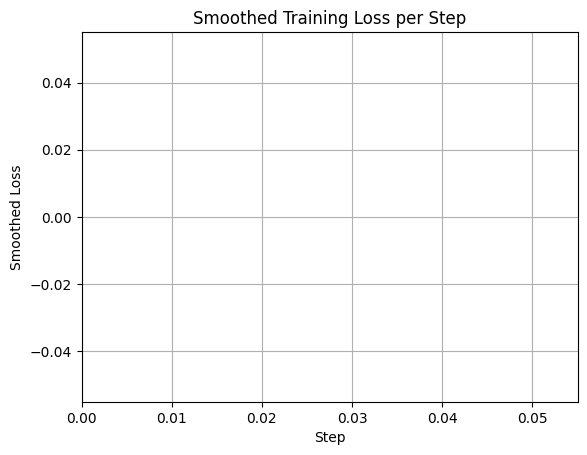

[]


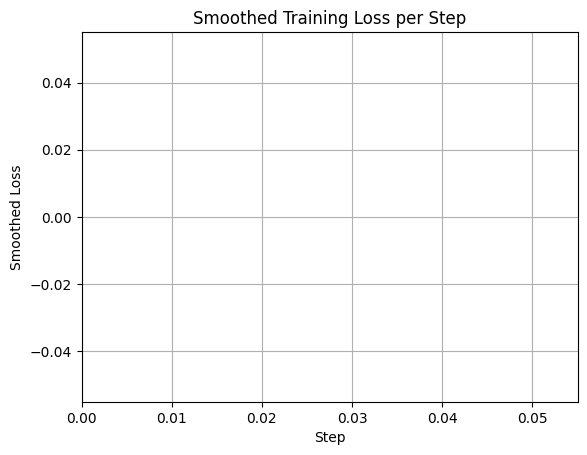

AttributeError: 'RewardHistory' object has no attribute 'rewards'

In [16]:
env = Plasticity(1,(X_test,y_test),False)
scores = dqn.test(env, nb_episodes=3, visualize=False,verbose=0)
print(dqn.metrics_names)

print(np.mean(scores.history['episode_reward'])*100,'%')
def moving_average(data, window_size):
    return [np.mean(data[i:i+window_size]) for i in range(len(data) - window_size + 1)]
losses = loss_history.losses
losses2 = loss_history2.losses
smoothed_losses = moving_average(losses, window_size=50)  
print(smoothed_losses)
plt.plot(smoothed_losses)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

smoothed_losses2 = moving_average(losses2, window_size=70)  
print(smoothed_losses2)
plt.plot(smoothed_losses2)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

plt.plot(moving_average(reward_history.rewards, window_size=70))
plt.title('Training Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

print("___________________________________________________________________________________________________________________________")




